In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from scipy import signal
import jax.numpy as np
import jax_cosmo.power as power
import jax_cosmo.transfer as tklib
import jax_cosmo as jc 
cosmo = jc.Planck15()


Populating the interactive namespace from numpy and matplotlib


In [2]:
z=linspace(1,2,256)
pz = zeros_like(z)
pz[50] =1. 
nz1 =jc.redshift.single_plane(1.)
nz2 = jc.redshift.smail_nz(1., 2.,  1.)
nz3 = jc.redshift.smail_nz(1., 2.,  0.5)
nz4=jc.redshift.kde_nz(z, pz, bw=0.05)
nz5 =jc.redshift.single_plane(2.)
nzs=[nz1,nz2,nz3,nz4,nz5]
ell = np.logspace(1,3)

In [3]:
probes = [jc.probes.WeakLensing(nzs)] 

In [4]:
cls = jc.angular_cl.angular_cl(cosmo, ell, probes)


/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


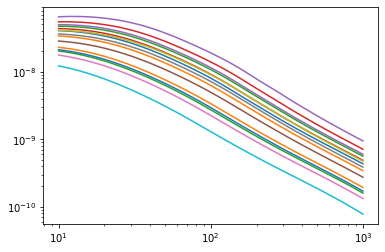

In [5]:
for i in range(len(cls)):
    loglog(ell,cls[i])

In [6]:
import astropy.units as u
import pyccl as ccl
cosmo_ccl = ccl.Cosmology(
  Omega_c=0.2589, Omega_b=0.0486, 
  h=0.6774, sigma8 = 0.8159, n_s=0.9667, Neff=0,
  transfer_function='eisenstein_hu', matter_power_spectrum='halofit')
z_source=1.
pz = zeros_like(z)
pz[argmin(abs(z_source - z))] = 1. 
nzs_s=jc.redshift.kde_nz(z, pz, bw=0.01)
tracer=ccl.WeakLensingTracer(cosmo_ccl, (z, nzs_s(z)), use_A_ia=False)
cl_ccl = ccl.angular_cl(cosmo_ccl, tracer, tracer, ell) 


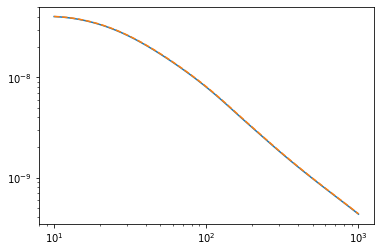

In [7]:
loglog(ell,cls[0])
loglog(ell,cl_ccl,'--')